<a href="https://colab.research.google.com/github/ChetanJadhav2341/Play-Store-App-Review-Analysis-EDA-/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

# **#  Importing Libraries**

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing Data Set
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
file_path='/content/drive/MyDrive/EDA/Play Store App Review Analysis/Play Store Data.csv'

In [4]:
playstore_df = pd.read_csv(file_path)

# **B. Examine and read the Data Summary**

In [5]:
# Verify the type of data we are going to study
type(playstore_df)

pandas.core.frame.DataFrame

In [6]:
# Inspecting the first five rows of the Data set 
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
playstore_df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1813,Cooking Madness - A Chef's Restaurant Games,GAME,4.7,358817,49M,"10,000,000+",Free,0,Everyone,Arcade,"July 30, 2018",1.2.2,4.1 and up
8633,To Do List,PRODUCTIVITY,4.7,253155,3.5M,"5,000,000+",Free,0,Everyone,Productivity,"March 19, 2018",3.0.17,4.0 and up
7579,cm to inches | centimeters to inches conversion,TOOLS,4.8,52,1.9M,"5,000+",Free,0,Everyone,Tools,"May 7, 2018",1.3.2,4.0 and up
7571,My Style CM 13 Theme,PERSONALIZATION,4.5,314,11M,"10,000+",Free,0,Everyone,Personalization,"September 8, 2016",1.9,5.0 - 6.0
10424,First Hawaiian Bank Mobile,FINANCE,2.1,232,29M,"10,000+",Free,0,Everyone,Finance,"May 9, 2018",18.1.79,5.0 and up


In [8]:
# Printing The shape oF Data set
playstore_df.shape

(10841, 13)

# We have total 10841 Rows and 13 Columns in the Data Set.

In [9]:
# Printing the information of Dataset to get the better idea of Data type and Memory use 
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


-The info() function is used to print a brief summary of a DataFrame which prints the shape of
data i.e. number of rows(entries) and number of columns.This method prints information
about a Data Frame including the index dtype and column dtypes, non-null counts and
memory usage.


In [10]:
# Printing the Statistics summary
playstore_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


-The describe() method is used for calculating some statistical data like percentile, mean and
std of the numerical values of the Series or DataFrame. It analyzes both numeric and object
series and also the DataFrame column sets of mixed data types.


# **C. Data Cleaning**

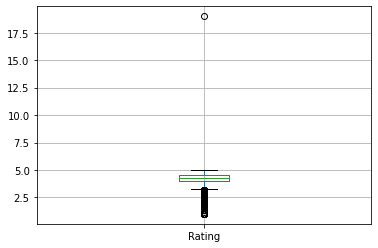

In [11]:
# lets plot a Box plot for rating column to get some idea about the rating columns
playstore_df.boxplot();

A box plot is a method for graphically depicting groups of numerical data through their
quartiles.This represents the average of this numerical data.
-From above observasion we can see there are values which are greater than 5. The rating of
every app has to be max 5 and not greater than it so lets try to find out this outlier.

In [12]:
# Checking how many outliers are there in Rating column and lets find out which row it is
playstore_df[playstore_df.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [13]:
# The category, Rating and Reviews Column have irregular data so i'am dropping this row having an index 10472

playstore_df.drop([10472], inplace=True)

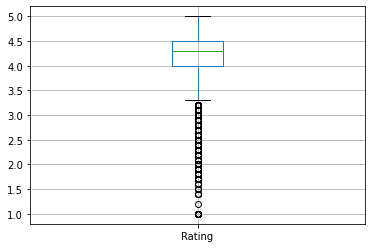

In [14]:
# Lets check do i successfully droped the unwanted column

playstore_df.boxplot();

# **D. Data Processing**

# Handling Data Types of each Feature

In [15]:
playstore_df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [16]:
playstore_df['Reviews'].value_counts

<bound method IndexOpsMixin.value_counts of 0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: Reviews, Length: 10840, dtype: object>

In [17]:
# 1) clean the 'Reviews' data and change the type 'object' to 'float'

reviews = [i for i in playstore_df['Reviews']]

def clean_reviews(reviews_list):
  '''
  As 'M' has been found the in reviews data, this function replace it with million
  '''
  cleaned_data=[]
  for review in reviews_list:
    if 'M' in review:
      review=review.replace('M', '')
      review=float(review)*100000  # 1M=1000000
    cleaned_data.append(review)
  return cleaned_data

playstore_df['Reviews']=clean_reviews(reviews)
playstore_df['Reviews']=playstore_df['Reviews'].astype(float)


Other Features like Size, Installs, Price and Android Vers also must be of numeric type. The
values they are holding must be changed to a proper format so that we can use them for
analysis and plots. Example : '10000+' to 10000


In [18]:
playstore_df['Size'].value_counts

<bound method IndexOpsMixin.value_counts of 0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10836                   53M
10837                  3.6M
10838                  9.5M
10839    Varies with device
10840                   19M
Name: Size, Length: 10840, dtype: object>

In [19]:
playstore_df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [20]:
# 2) clean the 'Size' data and change the type 'object' to 'float'

# found value with '1,000+' in one of record, remove it from data_frame as uncertain whether it is 'M' or 'k'

index = playstore_df[playstore_df['Size']== '1,00+'].index
playstore_df.drop(axis=0, inplace=True, index=index)

sizes = [i for i in playstore_df['Size']]

def clean_sizes(sizes_list):
  """
  As sizes are represented in 'M' and 'K', we remove 'M' 
  and convert 'K'/ kilobytes into megabytes
  """
  cleaned_data = []
  for size in sizes_list:
    if 'M' in size:
      size = size.replace('M', '')
      size = float(size)
    elif 'k' in size:
      size = size.replace('k','')
      size = float(size)
      size = size/1024   # 1 megabyte =1024 kilobytes
   # representing 'Varies with device' with value 0
    elif 'Varies with device' in size:
      size = float(0)
    cleaned_data.append(size)
  return cleaned_data

playstore_df['Size']= clean_sizes(sizes)
playstore_df['Size']= playstore_df['Size'].astype(float) 

In [21]:
playstore_df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [22]:
playstore_df['Installs'].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: Installs, dtype: int64

In [23]:
#  3) clean the 'Installs' data and change the type 'object' to 'float'

installs = [i for i in playstore_df['Installs']]

def clean_installs(installs_list):
  cleaned_data = []
  for install in installs_list:
    if ',' in install:
      install = install.replace(',','')
    if 'Free' in install:
      install = install.replace('Free','0')
    if ' ' in install:
      install = install.replace(' ','')
    if '+' in install:
      install = install.replace('+','')
    install = int(install)
    cleaned_data.append(install)
  return cleaned_data

playstore_df['Installs']= clean_installs(installs)
playstore_df['Installs']= playstore_df['Installs'].astype(float)

In [24]:
playstore_df['Price'].value_counts

<bound method IndexOpsMixin.value_counts of 0        0
1        0
2        0
3        0
4        0
        ..
10836    0
10837    0
10838    0
10839    0
10840    0
Name: Price, Length: 10840, dtype: object>

In [25]:
playstore_df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [26]:
playstore_df['Price'].nunique()

92

In [27]:
# 4) clean the 'Price' data and change the type 'object' to 'float'

prices=[i for i in playstore_df['Price']]

def clean_prices(price_list):
  cleaned_data =[]

  for price in price_list:
    if '$' in price:
      price=price.replace('$','')
    if ' ' in price:
      price=price.replace(' ','')
    if 'Everyone' in price:
      price=price.replace('Everyone','0')
    cleaned_data.append(price)
  return cleaned_data

playstore_df['Price']=clean_prices(prices)
playstore_df['Price']=playstore_df['Price'].astype(float)

In [28]:
# look at the random 10 records in the apps dataframe to verify the cleaned columns
playstore_df.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9200,বাংলাflix,FAMILY,4.2,1111.0,7.3,100000.0,Free,0.00,Everyone,Entertainment,"June 5, 2018",3.6.1,4.1 and up
1937,Cover Fire: offline shooting games for free,GAME,4.7,725897.0,31.0,10000000.0,Free,0.00,Teen,Action,"August 3, 2018",1.8.20,4.1 and up
5257,AJ Gray Icon Pack,PERSONALIZATION,4.8,5.0,35.0,50.0,Paid,0.99,Everyone,Personalization,"April 22, 2018",1.1,4.1 and up
4904,Smart-AC Universal Remote Free,FAMILY,1.8,3270.0,1.8,500000.0,Free,0.00,Everyone,Entertainment,"August 18, 2015",1.0,2.2 and up
5310,Kymco AK 550,AUTO_AND_VEHICLES,4.3,47.0,58.0,1000.0,Free,0.00,Everyone,Auto & Vehicles,"November 11, 2016",1.0,2.3 and up
7279,CF Riga,HEALTH_AND_FITNESS,NaN,12.0,11.0,100.0,Free,0.00,Everyone,Health & Fitness,"July 9, 2018",4.2.2,4.1 and up
1253,TheFork - Restaurants booking and special offers,FOOD_AND_DRINK,4.3,37517.0,17.0,5000000.0,Free,0.00,Everyone,Food & Drink,"July 20, 2018",11.11.1,4.1 and up
10207,Profile Tracker - Who Viewed My Facebook Profile,SOCIAL,4.7,37090.0,4.8,500000.0,Free,0.00,Teen,Social,"August 1, 2018",5.4,4.1 and up
388,Calls & Text by Mo+,COMMUNICATION,4.2,83239.0,14.0,5000000.0,Free,0.00,Everyone,Communication,"April 19, 2018",3.0.4,4.0 and up
2074,Fruit Cube Blast,FAMILY,4.6,9199.0,80.0,500000.0,Free,0.00,Everyone,Puzzle;Brain Games,"August 3, 2018",1.2.7,4.1 and up


In [29]:
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            10840 non-null  float64
 5   Installs        10840 non-null  float64
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(5), object(8)
memory usage: 1.4+ MB


# Handling null values in Data

In [30]:
# counting the number of missing values in the dataframe format
playstore_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

Here, we realized that there are 1474 rows having null values under column 'Rating'. Hence,
we decided to replace the null values with median of overall 'Rating' values.

In [31]:
def replace_with_median(series):
  '''

  Given a series, replace the rows with null values 
  to median values

  '''

  return series.fillna(series.median())

playstore_df['Rating']=playstore_df['Rating'].transform(replace_with_median)
playstore_df['Rating']=playstore_df['Rating'].astype(float)

Then we apply mode for the Current_Ver,Android__Ver and Type.

In [33]:
def replace_with_mode(series):
  '''

  Given a series, replace the rows with null values 
  to median values

  '''

  return series.fillna(series.mode())

playstore_df['Rating']=playstore_df['Rating'].transform(replace_with_mode)
playstore_df['Current Ver']=playstore_df['Current Ver'].transform(replace_with_mode)
playstore_df['Android Ver']=playstore_df['Android Ver'].transform(replace_with_mode)

In [38]:
playstore_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [40]:
# count duplicate in 'App'
playstore_df['App'].duplicated().sum()

1181

In [41]:
#dropping duplicates value in 'App' column using drop_duplicates() function

playstore_df.drop_duplicates(subset='App', inplace=True)

In [45]:
#Lets check the modified data
playstore_df.shape

(9659, 13)

Hence we successfully droped all the duplicates values and Data is ready for analysis.